This notebook serves as a tutorial to use the `py-qhe-epr` library. Please see: https://github.com/sohrabganjian/py-qhe-epr/ (currently not working)

### Table of Contents

* [1 - Introduction](#introduction)
* [2 - I just want to run something quickly...](#run_quickly)
* [3 - Generating qubits](#gen_qubits)
* [4 - Passing circuits](#passing_circuits)
* [5 - EPR scheme with FHE](#epr_fhe)
* [6 - Testing the correctness](#testing_correctness)
* [7 - References](#refs)

### 1- Introduction <a class="anchor" id="introduction"></a>

The implementation presented in this library follows the qunatum homomorphic encryption scheme presented in <a href="https://arxiv.org/pdf/1412.8766.pdf">Quantum homomorphic encryption for circuits of low T-gate complexity</a> by Anne Broadbent and Stacey Jeffery. The scheme makes use of a fully homoomorphic encryption scheme. In this implmentation, we have incorporated the BFV scheme. The implementation is borrowed from https://github.com/sarojaerabelli/py-fhe. 

### 2 - I just want to run something quickly... <a class="anchor" id="run_quickly"></a>

To get started for the first time, we highly recommend that you begin by cloning the repo first, or download the source code as a ZIP file and extract it. 

```bash
   git clone https://github.com/sohrabganjian/py-qhe-epr.git
```

Then try running the `epr_scheme_no_fhe.ipynb` under the `epr-no-fhe` folder, since this library does not have dependency on the FHE scheme. The following code block loads the said notebook into your session so you can get started right away!  

In [1]:
import os

# change the directory to run the desired notebook 
relative_path = 'epr-no-fhe'
current_dir = os.getcwd()
epr_no_fhe_dir = os.path.join(current_dir, relative_path)
os.chdir(epr_no_fhe_dir)

In [2]:
%run epr_scheme_no_fhe.ipynb

In [3]:
psi = zero_state()
input_state_dimension = int(np.log2(psi.shape[0]))
a = [random.getrandbits(1) for i in range(input_state_dimension)]
b =  [random.getrandbits(1) for i in range(input_state_dimension)]
circuit = ["X"]
print(epr_qhe_no_fhe(psi, a, b, circuit))

[[0 0]
 [0 1]]


If the above cell works fine, then you must see an output like 
$$ 
\begin{bmatrix}
0 & 0 \\
0 & 1 
\end{bmatrix}  
$$

In that case, congratulations! You have successfully run your first simulation of quantum homomorphic encryption scheme by applying the $X$ gate on $|0 \rangle$. The output corresponds to the density matrix of $|1 \rangle$. 

### 3 - Generating qubits <a class="anchor" id="gen_qubits"></a>

You can create any one-qubit system by using the `gen_qubit` functionality. Upon receiving $\alpha$ and $\beta$ as input, it creates the vector representation of the quantum state $\alpha |0\rangle + \beta |1 \rangle$. Please ensure that the constraint $|\alpha|^2 + |\beta|^2 = 1$ is satisfied. 

In [4]:
alpha = 0.3
beta = np.sqrt(1-alpha**2)
psi = gen_qubit(alpha, beta)
print(psi)

[[0.3      ]
 [0.9539392]]


We can create quantum states of higher dimensions by taking tensor product of single qubits. In NumPy, `np.kron` function is used for taking tensor products. For example, the following block creates the state $|01 \rangle$

In [5]:
psi = np.kron(zero_state(), one_state())
print(psi)

[[0]
 [1]
 [0]
 [0]]


### 4 - Passing circuits <a class="anchor" id="passing_circuits"></a>

The description of the quantum circuit is provided with a list of strings where each member of the list represents one layer of the quantum circuit. It is important to note that every layer must contain a $n$-qubit gate, where $n$ is the dimension of the input state $|\psi\rangle$. Therefore, if the intention is to not act upon a specific qubit, then the identity gate must be specified for that qubit. Moreover, the circuit should strictly consist one of Clifford $(I, X, Z, H, P, CNOT)$+$T$ gates. 

Below, you can see examples of multiple circuits and how the description of those circuits are passed as a parameter in the implementation (the circuits are plotted by IBM's qiskit package). 

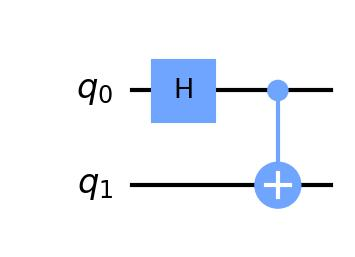

In [6]:
circuit = ["HI","CNOT"]

The `circuit` specifies to apply the $H \otimes I$ first, followed by applying the $CNOT$ gate.

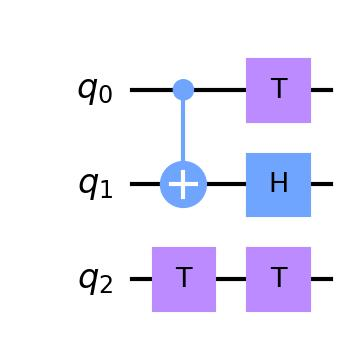

In [7]:
circuit = ["CNOTT","THT"]

In [8]:
psi = iterated_tensor_prod(zero_state(), 3)
input_state_dimension = int(np.log2(psi.shape[0]))
a = [random.getrandbits(1) for i in range(input_state_dimension)]
b =  [random.getrandbits(1) for i in range(input_state_dimension)]
circuit = circuit = ["CNOTT","THT"]
print(np.round(epr_qhe_no_fhe(psi, a, b, circuit),2))

[[0.5+0.j 0. +0.j 0.5-0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5-0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


### 5 - EPR scheme with FHE <a class="anchor" id="epr_fhe"></a>

First, we need to load the appropriate notebook:

In [9]:
import os

# change the directory to run the desired notebook 
relative_path = 'epr-fhe'
epr_no_fhe_dir = os.path.join(current_dir, relative_path)
os.chdir(epr_no_fhe_dir)

Please note that the modules in `epr_scheme.ipynb` depends on the installation of the `py-fhe` package. The installation instructions can be found here:

 - https://github.com/sarojaerabelli/py-fhe

In [10]:
%run epr_scheme.ipynb

In [11]:
psi = zero_state()
a = [random.getrandbits(1) for i in range(int(np.log2(psi.shape[0])))]
b =  [random.getrandbits(1) for i in range(int(np.log2(psi.shape[0])))]
circuit = ["X"]
output = epr_quantum_homomorphic_scheme(psi, a, b, circuit)
print(output)

[[0 0]
 [0 1]]


If you were able to run the above cell succeffully, then you have successfully run the full simulation of the EPR scheme using a fully homomorphic encryption scheme for performing key updates! 

### 6 - Testing the correctness <a class="anchor" id="testing_correctness"></a>

The code block below generates a random circuit using an input that specifes the number of layers. The code then performs the circuit evaluation both homomorphically and in the clear to check the correctness of the output. 

Please note that as the depth of the circuit increases, the numerical accuracy decreases. 

In [12]:
psi = gen_epr()

input_state_dimension = int(np.log2(psi.shape[0]))
a = [random.getrandbits(1) for i in range(input_state_dimension)]
b =  [random.getrandbits(1) for i in range(input_state_dimension)]

# you can change the number of layers
number_of_layers = 5

# you can set a threshold for the number of T gates in the circuit. 
max_T_gates = 3
t_gate_count = 0

gates = ["I", "X", "Z", "H","P","CNOT", "T"]

circuits = ["0"]*number_of_layers

for i in range(number_of_layers):
    gate_dimension = 0        
    for j in range(input_state_dimension):
        if "CNOT" not in gates:
            gates.append("CNOT")
        if gate_dimension + 2 > input_state_dimension:
            gates.remove("CNOT")
        if gate_dimension + 1 > input_state_dimension:
            continue
        current_gate = random.choice(gates)
        if current_gate == "T":
            t_gate_count = t_gate_count + 1
        if t_gate_count >= max_T_gates:
            gates = ["I", "X", "Z", "H","P","CNOT"]

        if current_gate != "CNOT":
            gate_dimension = gate_dimension + 1

        if current_gate == "CNOT":
            gate_dimension = gate_dimension + 2

        circuits[i] = ''.join(circuits[i] + current_gate)

circuits = [s[1:] for s in circuits]
circuits



output = epr_quantum_homomorphic_scheme(psi, a, b, circuits)

evaluated_circuit_in_clear = psi
Gate_by_gate_circuit = tcl_layers(circuits)
for GateNumber in range(len(Gate_by_gate_circuit)):
    current_circuit = np.array([1])
    for quasi_qubit_number in range(len(Gate_by_gate_circuit[GateNumber])):
        current_gate = Gate_by_gate_circuit[GateNumber][quasi_qubit_number]

        if current_gate == "I":
            current_circuit = np.kron(current_circuit, I)

        if current_gate == "X":
            current_circuit = np.kron(current_circuit, X)

        if current_gate == "Z":
            current_circuit = np.kron(current_circuit, Z)

        if current_gate == "P":
            current_circuit = np.kron(current_circuit, P)

        if current_gate == "H":
            current_circuit = np.kron(current_circuit, H)

        if current_gate == "CNOT":
            current_circuit = np.kron(current_circuit, CNOT)

        if current_gate == "T":
            current_circuit = np.kron(current_circuit, T)

    evaluated_circuit_in_clear = current_circuit @ evaluated_circuit_in_clear

print("The evaluated circuit is:\n", circuits)

print()
    
print("Homomorphically evaluated state:\n",np.round(output,2))

print()

print("Evluated state in the clear:\n", np.round(pure_to_density(evaluated_circuit_in_clear),2))

print()

print("Are the outputs in both methods close to each other?", np.allclose(output, pure_to_density
                                                                          (evaluated_circuit_in_clear)))        

The evaluated circuit is:
 ['PX', 'TT', 'ZH', 'IP', 'TH']

Homomorphically evaluated state:
 [[ 0.25+0.j   -0.  -0.25j  0.18-0.18j  0.18+0.18j]
 [-0.  +0.25j  0.25-0.j    0.18+0.18j -0.18+0.18j]
 [ 0.18+0.18j  0.18-0.18j  0.25-0.j   -0.  +0.25j]
 [ 0.18-0.18j -0.18-0.18j -0.  -0.25j  0.25+0.j  ]]

Evluated state in the clear:
 [[ 0.25+0.j    0.  -0.25j  0.18-0.18j  0.18+0.18j]
 [ 0.  +0.25j  0.25+0.j    0.18+0.18j -0.18+0.18j]
 [ 0.18+0.18j  0.18-0.18j  0.25+0.j    0.  +0.25j]
 [ 0.18-0.18j -0.18-0.18j  0.  -0.25j  0.25+0.j  ]]

Are the outputs in both methods close to each other? True


Happy exploring! 😀

### 7 - References <a class="anchor" id="refs"></a>

 - A. Broadbent and S. Jeffery, “Quantum homomorphic encryption for circuits of low T-gate complexity,” in Advances in Cryptology — CRYPTO 2015, vol. 2, 2015, pp. 609–629

 - Zvika Brakerski. Fully homomorphic encryption without modulus switching from classical gapsvp. In Annual Cryptology Conference, pages 868–886. Springer, 2012.
https://eprint.iacr.org/2012/078.pdf

 - Junfeng Fan and Frederik Vercauteren. Somewhat practical fully homomorphic encryption. 2012. https://eprint.iacr.org/2012/144.

 - S. Erabelli, “py-fhe,” https://github.com/sarojaerabelli/py-fhe, 2020